In [1]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

In [2]:
# Load Data
df = pd.read_csv("Titanic.csv")
# To display the top 5 rows
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# To display the bottom 5 rows
df.tail(5) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
# Checking the data type
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
# Dropping irrelevant columns
df = df.drop(['Name','Ticket','PassengerId'], axis=1)
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [6]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
df.loc[:,'Sex'].describe()

count    891.000000
mean       1.352413
std        0.477990
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: Sex, dtype: float64

In [7]:
# Total number of rows and columns
df.shape

(891, 9)

In [8]:
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape)
# Dropping the duplicates 
#df = df.drop_duplicates()

Number of duplicate rows:  (107, 9)


In [10]:
# Finding the null values.
print(df.isnull().sum())
#df = df.dropna() 
#df.count()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64


# Detecting Outliers

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


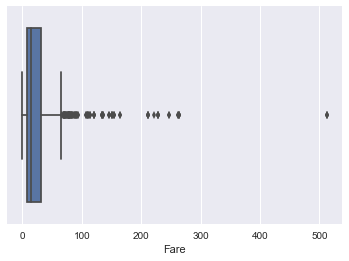

In [24]:
print(df['Fare'].describe())

sns.boxplot(x=df['Fare'])

# Plotting a Histogram

Text(0.5,0,'Age')

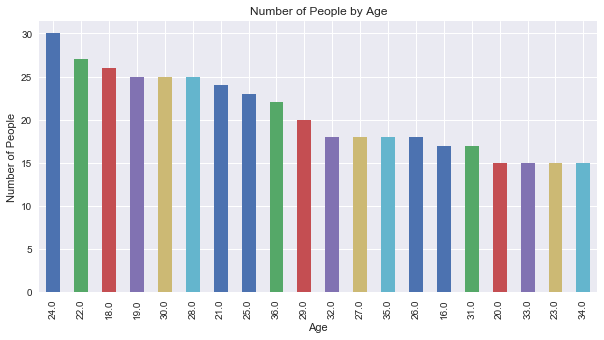

In [12]:
# Plotting a Histogram
df.Age.value_counts().nlargest(20).plot(kind='bar', figsize=(10,5))
plt.title("Number of People by Age")
plt.ylabel("Number of People")
plt.xlabel("Age")

Text(0.5,0,'Dender')

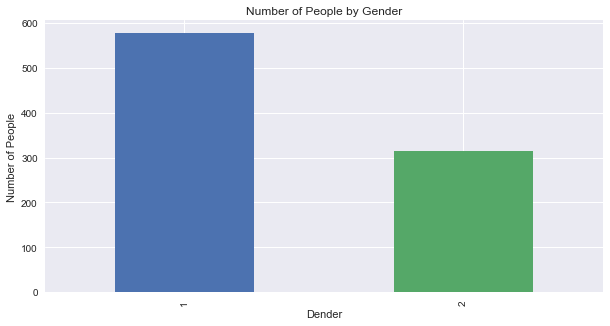

In [25]:
# Plotting a Histogram
df.Sex.value_counts().nlargest(2).plot(kind='bar', figsize=(10,5))
plt.title("Number of People by Gender")
plt.ylabel("Number of People")
plt.xlabel("Dender")

Text(0.5,0,'Class')

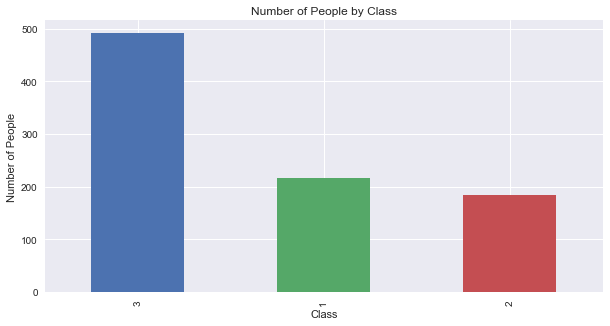

In [14]:
# Plotting a Histogram
df.Pclass.value_counts().nlargest(3).plot(kind='bar', figsize=(10,5))
plt.title("Number of People by Class")
plt.ylabel("Number of People")
plt.xlabel("Class")

# Testing the hypothesis that gender affect the probability of survival


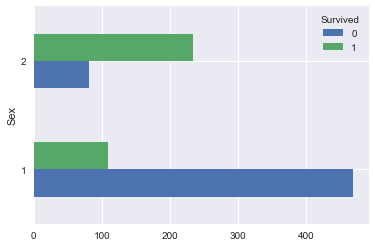

In [20]:
df.loc[:,['Survived','Sex']].groupby('Sex').Survived.value_counts().unstack().plot.barh()

# Testing the hypothesis that Person Class affect the probability of survival

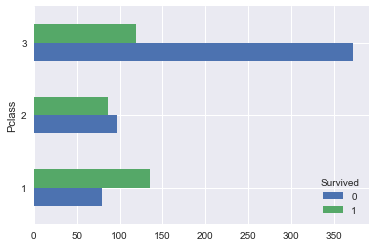

In [16]:
df.loc[:,['Survived','Pclass']].groupby('Pclass').Survived.value_counts().unstack().plot.barh()

In [17]:
df.loc[df['Sex']== "male" , 'Sex'] = 1
df.loc[df['Sex']== "female" , 'Sex'] = 2
#df.loc[:,['Survived','Sex']]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333
Age,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000


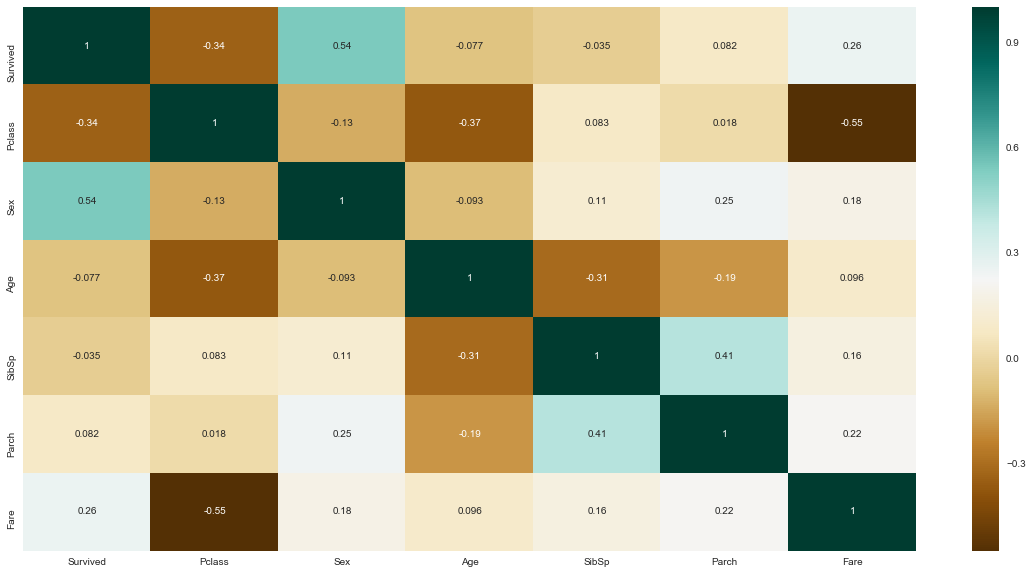

In [18]:
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [9]:
# Used to count the number of rows before removing the data
df.count() 

Survived    891
Pclass      891
Sex         891
Age         714
SibSp       891
Parch       891
Fare        891
Cabin       204
Embarked    889
dtype: int64